In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
notes = pd.read_csv('../../../Data/notes_statistiques.csv')
notes.head()

,Notes examen de statistiques,Effectifs
0,0,0
1,1,0
2,2,2
3,3,0
4,4,1


In [4]:
# CONSTANTES DE L'ETUDE
NB_CLASSES = 5
LABELS = ['0-4', '4-8', '8-12', '12-16', '16-20']

In [5]:
# 01 rename
notes = notes.rename(columns={'Notes examen de statistiques': 'Notes'})
notes.head()

,Notes,Effectifs
0,0,0
1,1,0
2,2,2
3,3,0
4,4,1


In [6]:
# 02 ajout de la colonne Frequence 
# Type de la variable Notes : quantitative continue ou discret 
# car elle peut prendre théoriquement toutes les valeurs dans l'intervalle 0 à 20

In [7]:
# 03 Ajoutez une colonne Frequence pour la fréquence des notes de notre dataset.
notes['Frequence'] = notes['Effectifs'] / notes['Effectifs'].sum()

notes.head()

,Notes,Effectifs,Frequence
0,0,0,0.00
1,1,0,0.00
2,2,2,0.08
3,3,0,0.00
4,4,1,0.04


In [8]:
notes['notes_bin'] = pd.qcut( notes['Notes'], NB_CLASSES, labels = LABELS)

In [9]:
notes

,Notes,Effectifs,Frequence,notes_bin
0,0,0,0.00,0-4
1,1,0,0.00,0-4
2,2,2,0.08,0-4
3,3,0,0.00,0-4
4,4,1,0.04,0-4
5,5,0,0.00,4-8
6,6,1,0.04,4-8
7,7,0,0.00,4-8
8,8,1,0.04,4-8
9,9,1,0.04,8-12


In [12]:
# Regroupement des notes par rapport a nos intervalles
grouped = notes.groupby('notes_bin')
class_notes = grouped[['Effectifs', 'notes_bin']].sum(numeric_only=True)
class_notes['Frequences'] =  class_notes['Effectifs'] /  class_notes['Effectifs'].sum()

class_notes

,Effectifs,Frequences
notes_bin,,
0-4,3,0.12
4-8,2,0.08
8-12,13,0.52
12-16,5,0.20
16-20,2,0.08


In [11]:
class_notes['Effectifs'].plot(kind='bar');

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


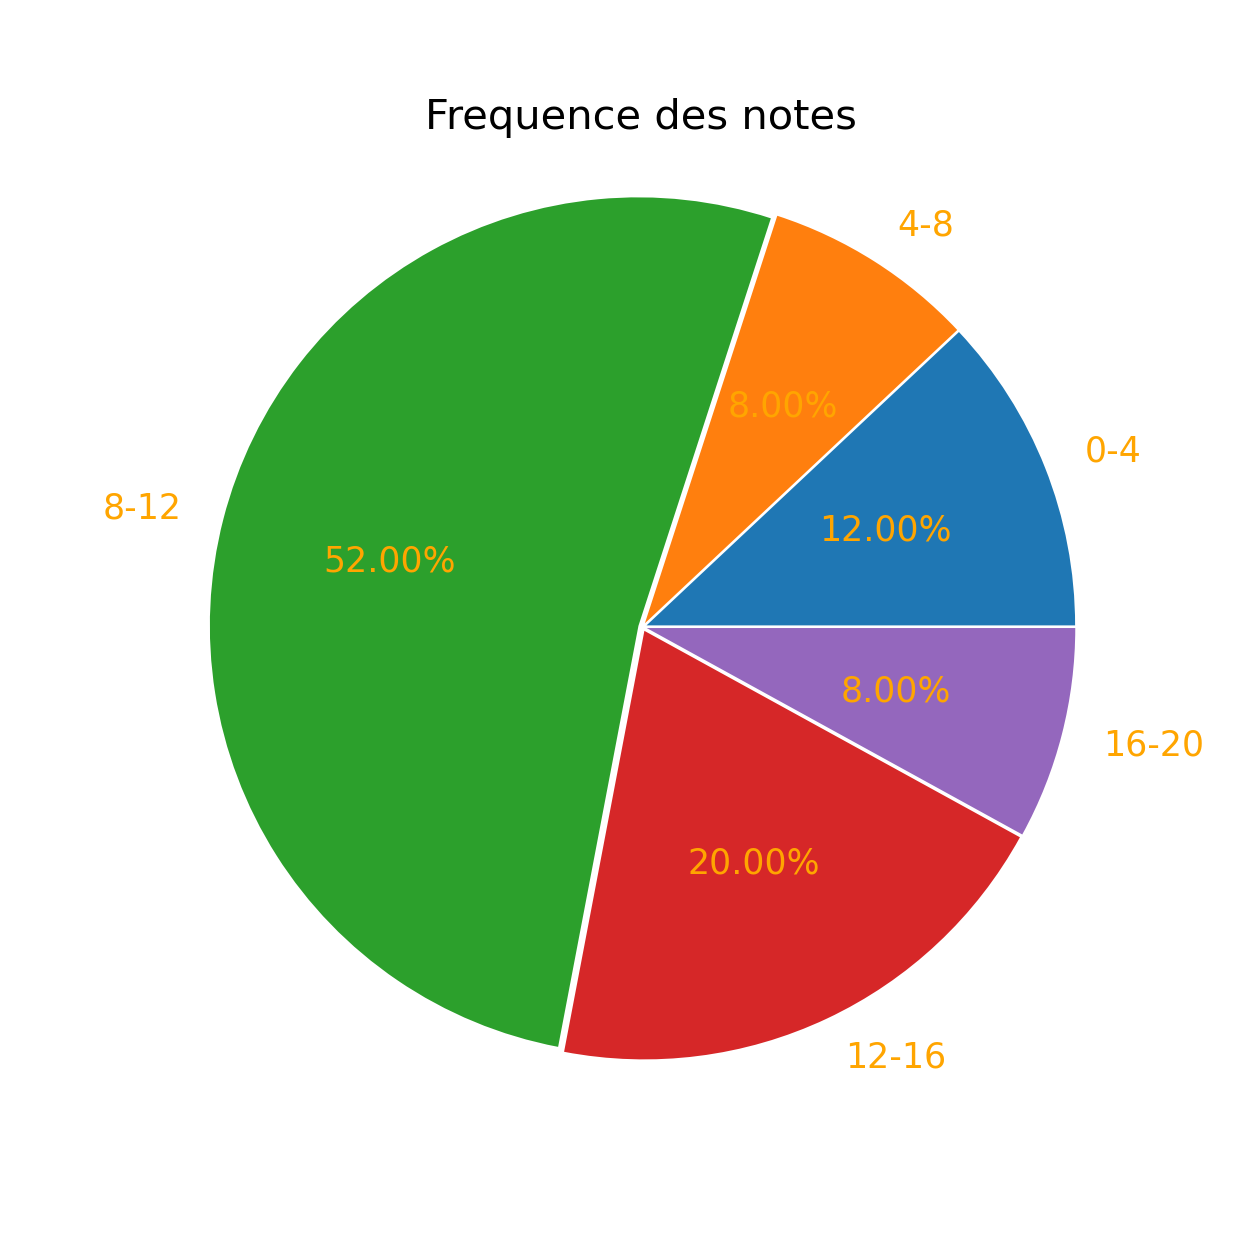

In [33]:
sizes = class_notes['Effectifs']
labels = class_notes.index
explode = (0.01,) * NB_CLASSES

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(sizes, labels=labels,
        autopct='%1.2f%%', explode = explode, textprops={'color': "orange"})
ax.axis('equal')

plt.title("Frequence des notes")

plt.show();